In [2]:
import csv
from os.path import join

import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Statistical Analysis
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

# Exercises on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [3]:
def load_data(file_path, file_name):
    '''
    this function reads the data file, loads the configuration attributes
    specifiefd in the heading (numer of examples and features), the list
    of feature names and loads the data in a matrix named data.
    '''
    with open(join(file_path, file_name)) as csv_file:
        data_file = csv.reader(csv_file, delimiter=',')
        temp1 = next(data_file)
        n_samples = int(temp1[0])
        # print("n_samples = {0}".format(n_samples))
        n_features = int(temp1[1])
        temp2 = next(data_file)
        feature_names = np.array(temp2[:n_features])

        data_list = [iter for iter in data_file]
        data = np.asarray(data_list, dtype=np.float64)

    return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset.
# "file_path" is the file path where the file with the data to be
# read are located.
#
# We assume the file contains an example per line.
# Each example is a list of real values separated by a comma (csv format).
#
# The first line of the file contains the heading with:
# N_samples, n_features.
#
# The second line contains the feature names separated by a comma

file_path = "../../data/raw/"

# all the three datasets contain data points on (x,y)
file_name1 = "dataset-1-3-clusters.csv"
file_name2 = "dataset-2-DBSCAN.csv"
file_name3 = "dataset-3-CURE-complete.csv"

data1, feature_names1, n_samples1, n_features1 = load_data(file_path, file_name1)
data2, feature_names2, n_samples2, n_features2 = load_data(file_path, file_name2)
data3, feature_names3, n_samples3, n_features3 = load_data(file_path, file_name3)

print("dataset n. 1: n_samples (rows): {0},\tn_features (cols): {1}".format(n_samples1, n_features1))
print("dataset n. 2: n_samples (rows): {0},\tn_features (cols): {1}".format(n_samples2, n_features2))
print("dataset n. 3: n_samples (rows): {0},\tn_features (cols): {1}".format(n_samples3, n_features3))

dataset n. 1: n_samples (rows): 150,	n_features (cols): 2
dataset n. 2: n_samples (rows): 6118,	n_features (cols): 2
dataset n. 3: n_samples (rows): 86558,	n_features (cols): 2


## Dataset 1

Plotting the dataset 1.

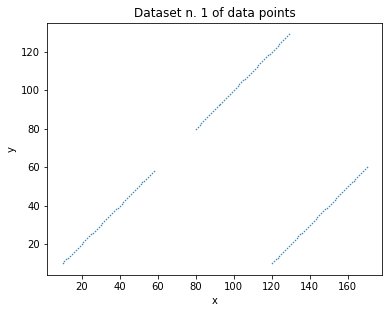

In [4]:
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

# plot the dataset
plt.plot(data1[:, 0], data1[:, 1], '.', markersize=1)
plt.show()

## Dataset 2

Plotting the dataset 2.

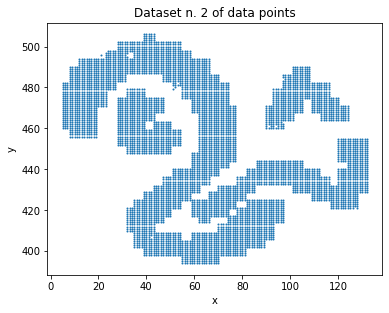

In [5]:
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

# plot the dataset
plt.plot(data2[:, 0], data2[:, 1], '.', markersize=2)
plt.show()

## Dataset 3

Plotting the dataset 3.

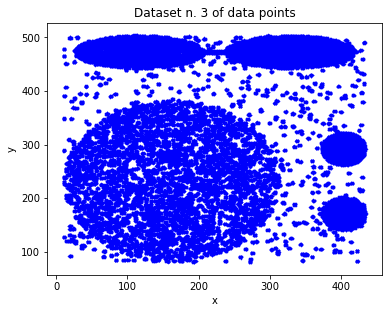

In [6]:
fig = plt.figure()

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

# plot the dataset
plt.plot(data3[:, 0], data3[:, 1], '.', markersize=1.2, markeredgecolor='blue')
plt.show()

## K-mean

### K-means on Dataset 1

Here we cluster the dataset 1 with K-means. From the plot of dataset n.1 we see **3 separated clusters**. Thus **k=3**. 

In [7]:
k = 3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

# Printing the prediction
i = 0
for i in range(n_samples1):
    print("Example n.{0} = ({1},{2}) in cluster n.{3}".format(i,
                                                              data1[i,0],
                                                              data1[i,1],
                                                              kmeans1.labels_[i]))

Example n.0 = (10.0,10.0) in cluster n.0
Example n.1 = (11.0,11.0) in cluster n.0
Example n.2 = (12.0,12.0) in cluster n.0
Example n.3 = (13.0,13.0) in cluster n.0
Example n.4 = (14.0,14.0) in cluster n.0
Example n.5 = (15.0,15.0) in cluster n.0
Example n.6 = (16.0,16.0) in cluster n.0
Example n.7 = (17.0,17.0) in cluster n.0
Example n.8 = (18.0,18.0) in cluster n.0
Example n.9 = (19.0,19.0) in cluster n.0
Example n.10 = (20.0,20.0) in cluster n.0
Example n.11 = (21.0,21.0) in cluster n.0
Example n.12 = (22.0,22.0) in cluster n.0
Example n.13 = (23.0,23.0) in cluster n.0
Example n.14 = (24.0,24.0) in cluster n.0
Example n.15 = (25.0,25.0) in cluster n.0
Example n.16 = (26.0,26.0) in cluster n.0
Example n.17 = (27.0,27.0) in cluster n.0
Example n.18 = (28.0,28.0) in cluster n.0
Example n.19 = (29.0,29.0) in cluster n.0
Example n.20 = (30.0,30.0) in cluster n.0
Example n.21 = (31.0,31.0) in cluster n.0
Example n.22 = (32.0,32.0) in cluster n.0
Example n.23 = (33.0,33.0) in cluster n.0
Ex

Plotting the clusters

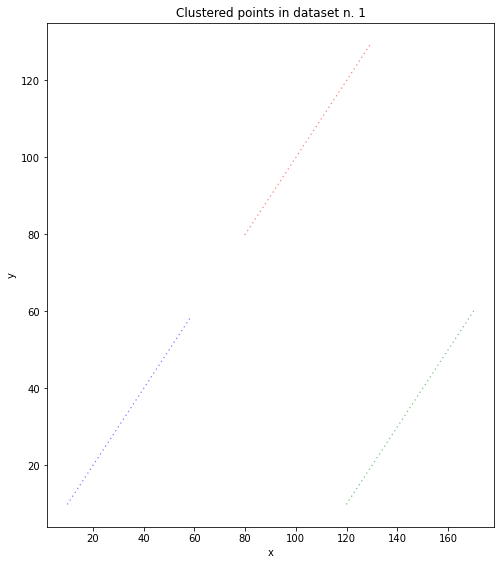

In [8]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

# plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i, 0] for i in range(n_samples1) if kmeans1.labels_[i] == clu]
    data_list_y = [data1[i, 1] for i in range(n_samples1) if kmeans1.labels_[i] == clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

### K-means on Dataset 2

In the following cell I propose you to perform clustering with K-means on dataset2.

In [9]:
k: int = 4  # number of clusters
kmeans2 = KMeans(n_clusters=k, random_state=0)
y_predicted = kmeans2.fit_predict(data2)

In the following you have to plot clustering results on dataset2.

**Question:** 
how do you explain what it happens?

**Answer:**
db scan non funziona bene quando c'è alta o bassa densità

Text(0.5, 1.0, 'dataset-DBSCAN')

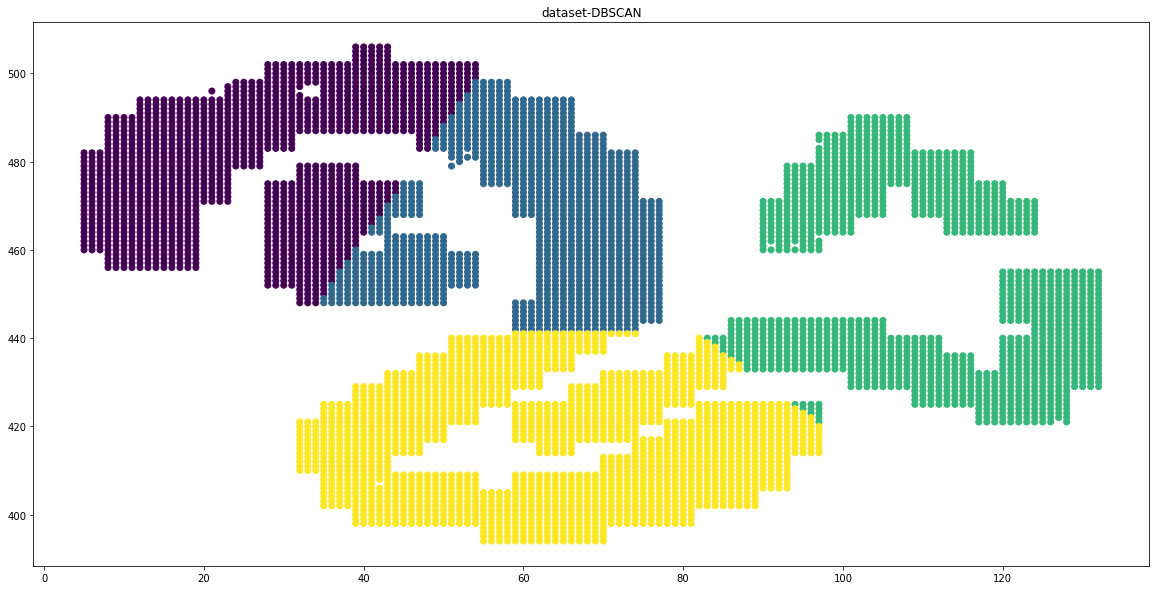

In [10]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(data2[:, 0], data2[:, 1], c=y_predicted)
plt.title("dataset-DBSCAN")
# fig.show()

### K-means on Dataset 3

In the following cell I propose you to perform clustering with K-means on the dataset 3.

In [11]:
k = 5  # I choose 5 because we can count 5 cluster on the plot

# from documentation:
#
# algorithm: {“auto”, “full”, “elkan”}, default=”auto”.
# K-means algorithm to use. The classical EM-style algorithm is “full”. 
# The “elkan” variation is more efficient on data with well-defined clusters, 
# by using the triangle inequality. However it’s more memory intensive due 
# to the allocation of an extra array of shape (n_samples, n_clusters).
kmeans3 = KMeans(n_clusters=k, random_state=0, algorithm="auto")
y_predicted_3 = kmeans3.fit_predict(data3)

In the following cell, I propose you to plot clustering results on dataset3.

**Question:** 
how do you explain what it happens?

Text(0.5, 1.0, 'dataset-cure-complete')

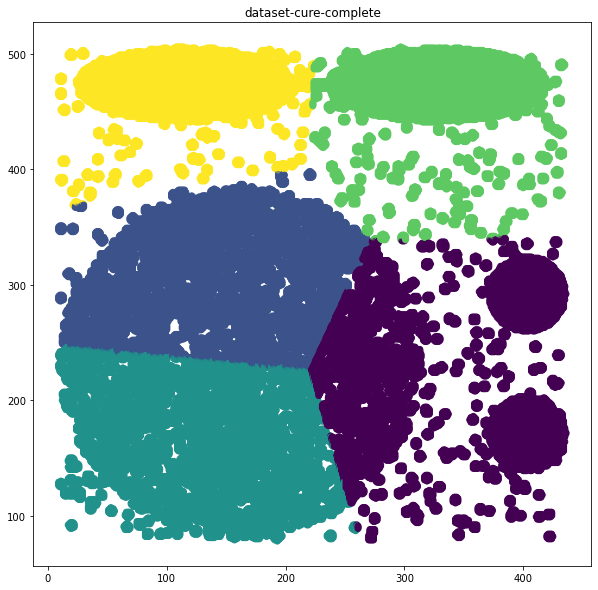

In [12]:
fig = plt.figure(figsize=(10,10))
plt.scatter(data3[:, 0], data3[:, 1], c=y_predicted_3)
plt.title("dataset-cure-complete")
# fig.show()

## Statistical Analysis

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

### Note:
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [13]:
def calculate_WSS(points, kmax):
    '''returns WSS score for k values, from 1 to kmax'''
    sse = []
    for k in range(1, kmax + 1):
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

        # append the computed sse to the result
        sse.append(curr_sse)
    return sse


def silhouette_analysis(X, range_n_clusters, s: str):
    '''
    Print the silhouette of the clusters
    '''

    store_score = dict()

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this context we
        # use -0.1,1
        ax1.set_xlim([-0.1, 1])

        # The (n_clusters + 1) * 10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, algorithm="elkan")
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters} The average silhouette_score is : {silhouette_avg}")

        store_score[n_clusters] = silhouette_avg

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the values
            # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            # 2nd Plot showing the actual clusters formed
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                        c=colors, edgecolor='k')

            # Labeling the clusters
            centers = clusterer.cluster_centers_
            # Draw white circles at cluster centers
            ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for KMeans clustering on {s} with n_clusters = {n_clusters}"),
                     fontsize=14, fontweight='bold')

    best_k = max(store_score, key=store_score.get)
    print(f"\nThe best solution is with n_clusters = {best_k}")
    print(f"with score = {store_score[best_k]}\n")

### Silhouette Analysis on clustered Dataset 1

For n_clusters = 2 The average silhouette_score is : 0.5651096232579514
For n_clusters = 3 The average silhouette_score is : 0.7229402453727759
For n_clusters = 4 The average silhouette_score is : 0.6824925173029859
For n_clusters = 5 The average silhouette_score is : 0.6372722940289592
For n_clusters = 6 The average silhouette_score is : 0.6113129278986535

The best solution is with n_clusters = 3
with score = 0.7229402453727759



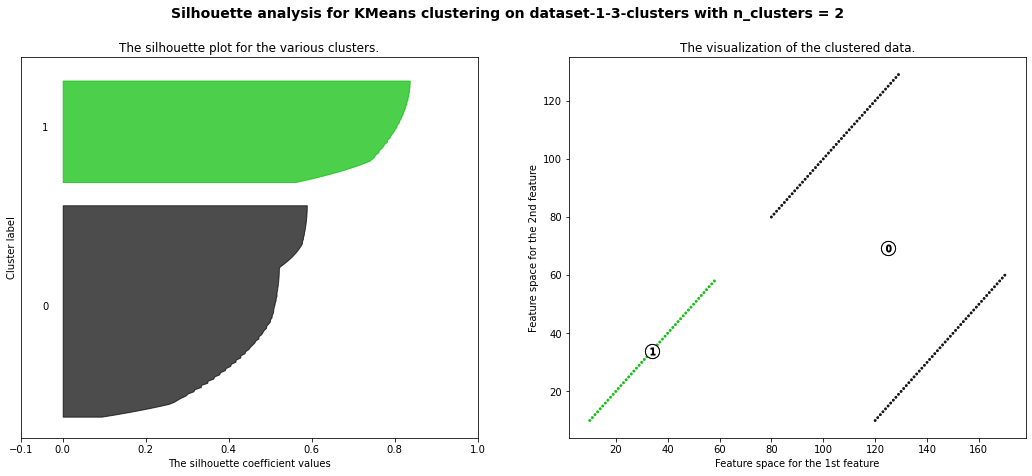

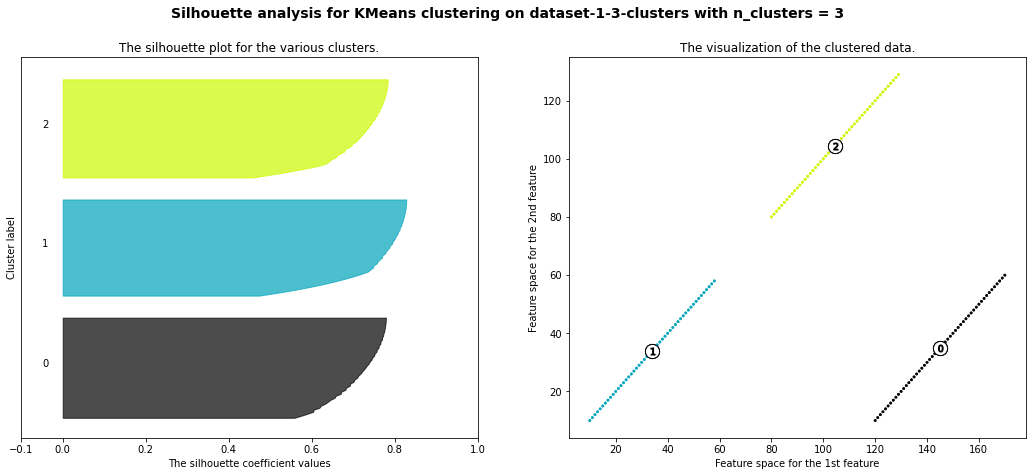

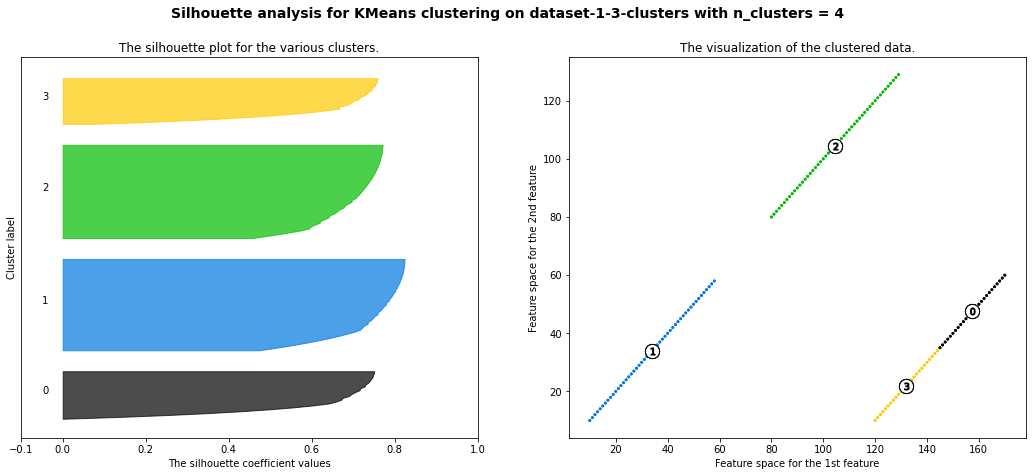

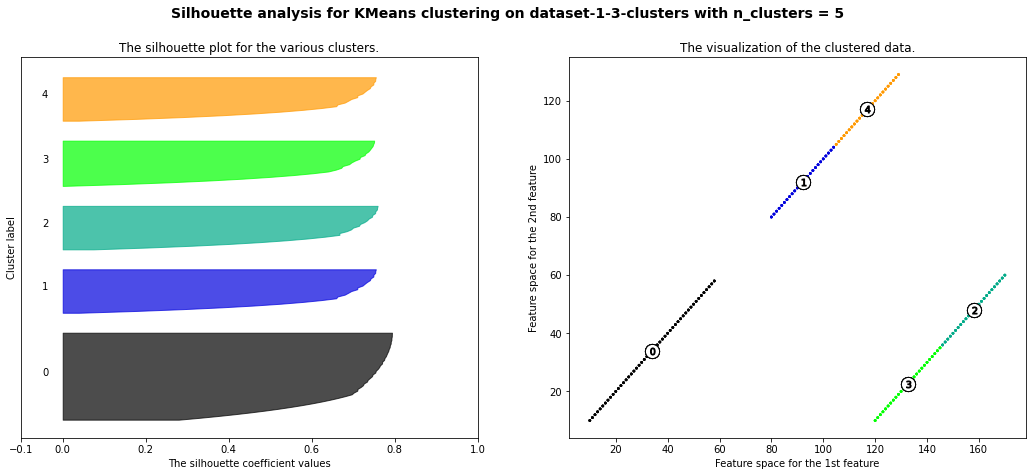

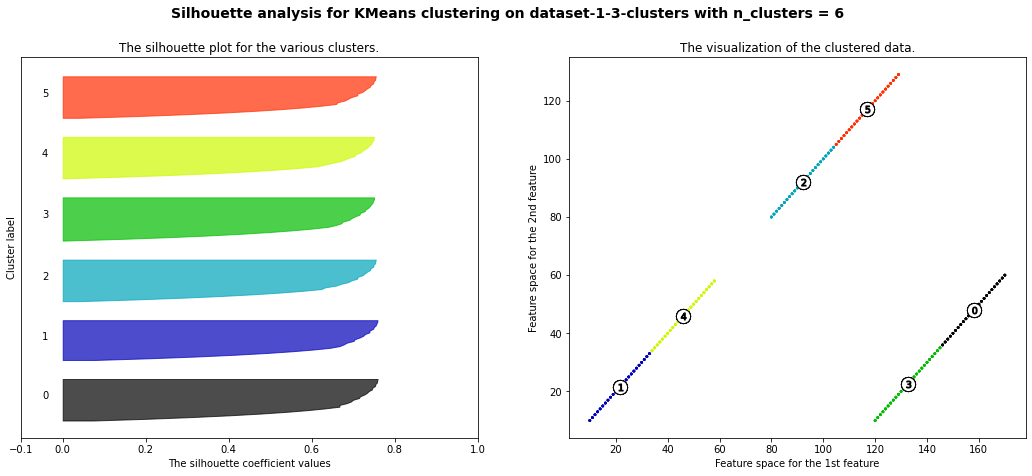

In [14]:
# For first dataset "3-cluster.csv"
name1 = file_name1[:-4]
silhouette_analysis(X=data1[:], range_n_clusters=[2, 3, 4, 5, 6], s=name1)

### Silhouette Analysis on clustered Dataset 2

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

For n_clusters = 2 The average silhouette_score is : 0.43322366812579544
For n_clusters = 3 The average silhouette_score is : 0.48006914019384417
For n_clusters = 4 The average silhouette_score is : 0.4161849907517932
For n_clusters = 5 The average silhouette_score is : 0.4247453357049124
For n_clusters = 6 The average silhouette_score is : 0.41023090652164795
For n_clusters = 7 The average silhouette_score is : 0.433295789519672
For n_clusters = 8 The average silhouette_score is : 0.44542881887774544

The best solution is with n_clusters = 3
with score = 0.48006914019384417



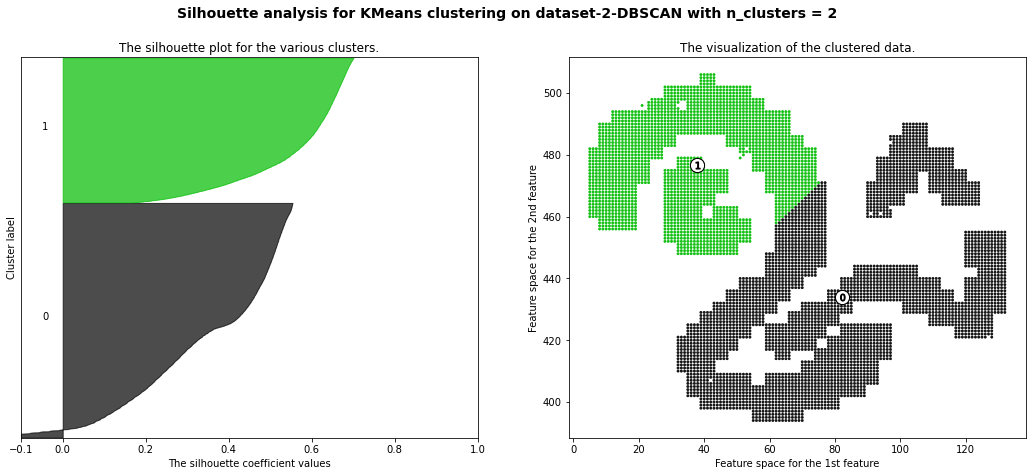

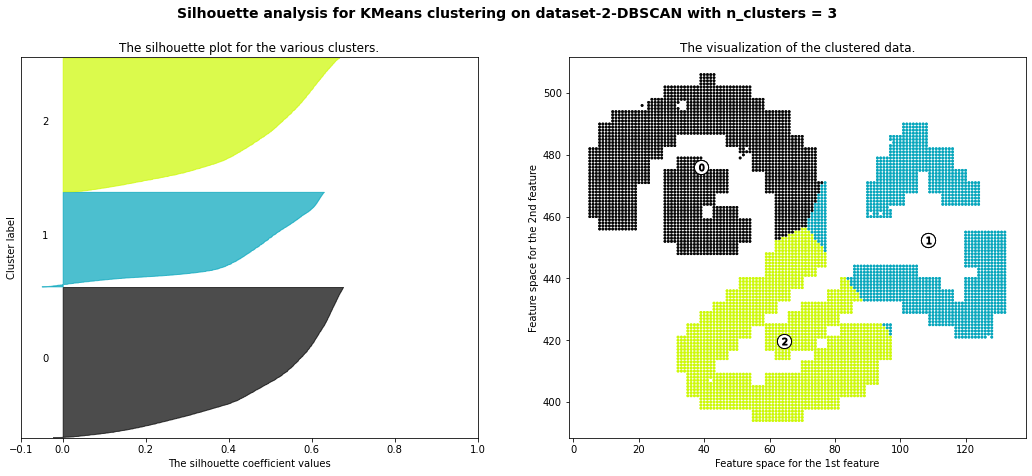

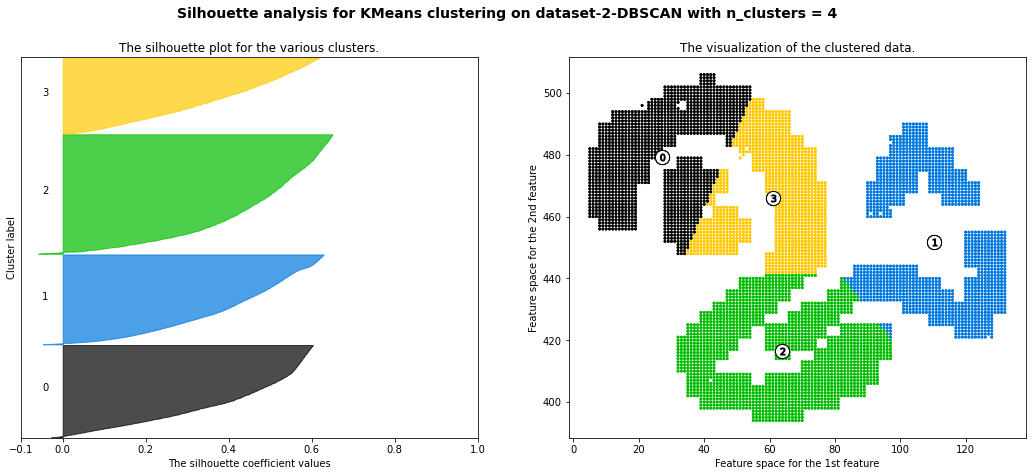

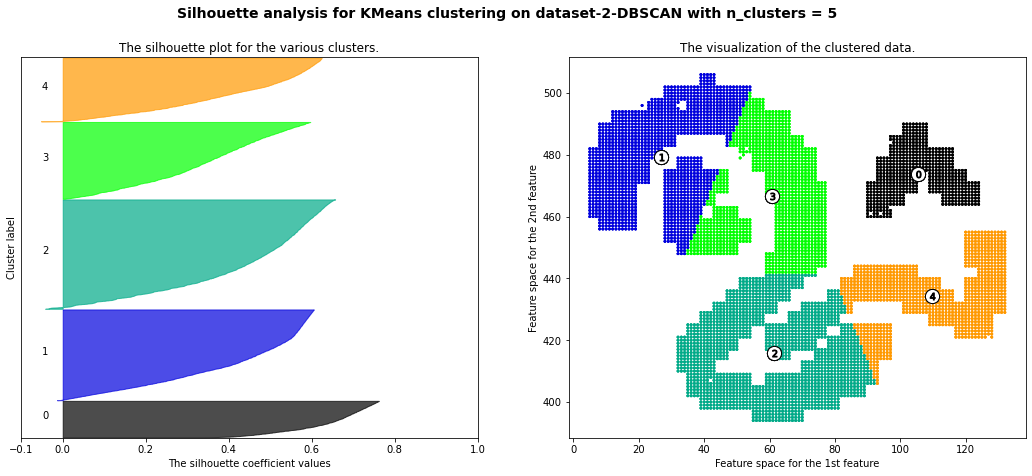

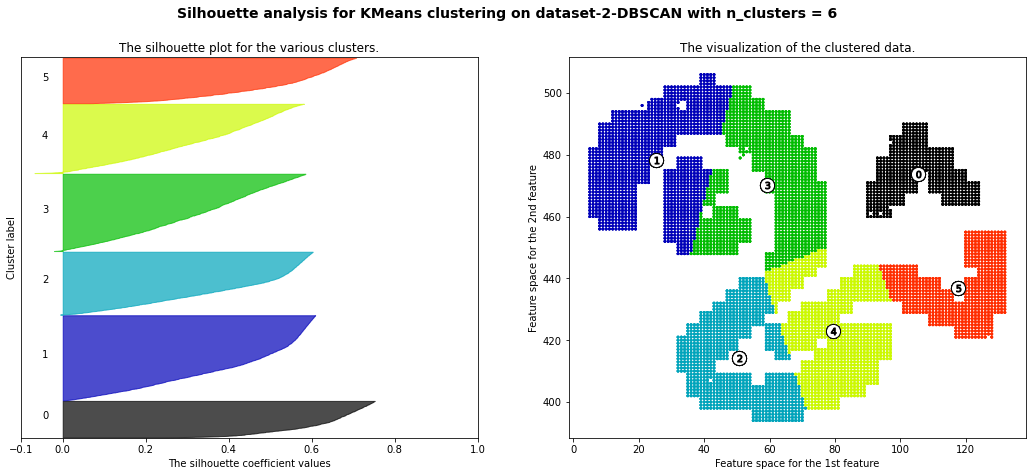

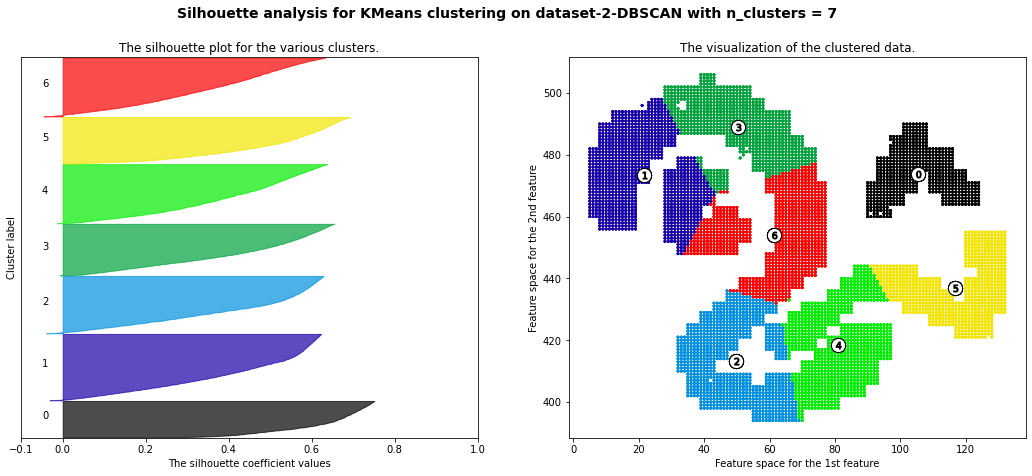

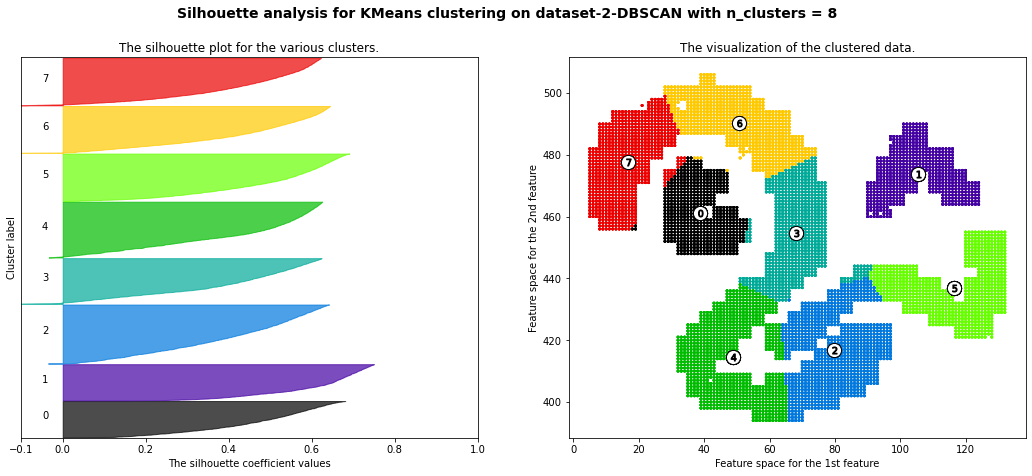

In [15]:
# For dataset-DB-SCAN
name2 = file_name2[:-4]
silhouette_analysis(X=data2[:], range_n_clusters=[2, 3, 4, 5, 6, 7, 8], s=name2)

### Silhouette Analysis on clustered Dataset 3

**WARNING!!** It takes almost **20 minutes to run on dataset 3!!**
**DO NOT RUN**

In [16]:
# For CURE-complete
name3 = file_name3[:-4]
#silhouette_analysis(X=data3[:], range_n_clusters=[4, 5, 6, 7], s=name3)

## DBScan

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

In [17]:
# First some utility functions

def compute_DBSCAN(X, eps, minpts):
    '''
    Compute DBSCAN on the X dataset
    '''
    db = DBSCAN(eps=eps, min_samples=minpts).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    return (core_samples_mask, labels, n_clusters_, n_noise_)


def plot_DBSCAN_result(X, labels, core_samples_mask):
    '''
    Plot DBScan result
    '''

    fig = plt.figure(figsize=(15, 10))

    # Black removed and used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='none', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='none', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()


def metrics_DBSCAN(n_clusters_, n_noise_, X):
    '''Metrics for DBSCAN (silhouette is too heavy for CURE)'''
    print(f"Estimated number of clusters: {n_clusters_}")
    print(f"Estimated number of noise points: {n_noise_}")

    # Homogeneity: score between 0.0 and 1.0. 1.0 stands for perfectly
    # homogeneous labeling
    print("Homogeneity: {0:.3f}\n".format(metrics.homogeneity_score(X[:, 1], labels)))

### DBScan on Dataset 2

Estimated number of clusters: 4
Estimated number of noise points: 1
Homogeneity: 0.103



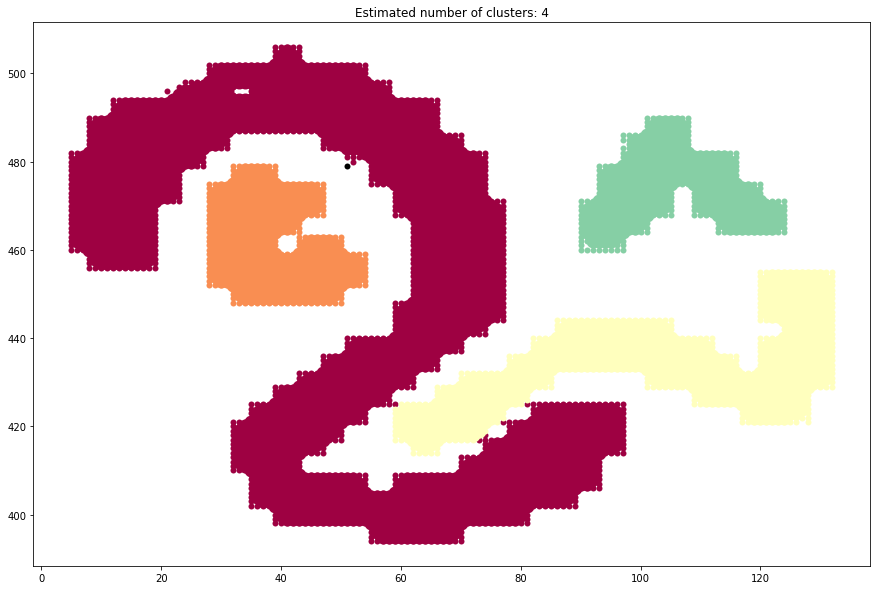

In [18]:
# Run of DBScan on dataset-2-DBSCAN
core_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data2, eps=2.9, minpts=20)

# Print some metrics
metrics_DBSCAN(n_clusters_, n_noise_, data2)

# Plot the clustered dataset
plot_DBSCAN_result(data2, labels, core_samples_mask)

### DBScan on Dataset 3

Estimated number of clusters: 5
Estimated number of noise points: 7281
Homogeneity: 0.123



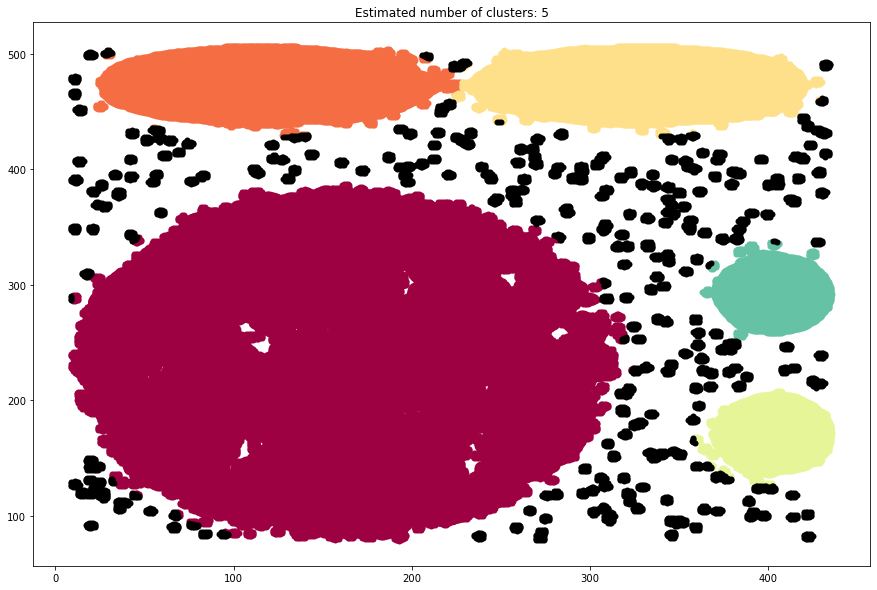

In [19]:
# Run of DBScan on dataset-3-CURE_complete
core_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data3,
                                                                  eps=13,
                                                                  minpts=300) 

# Print some metric
metrics_DBSCAN(n_clusters_, n_noise_, data3)

# plot the clustered dataset
plot_DBSCAN_result(data3, labels, core_samples_mask)

### DBScan optimization

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

#### Optimization on Dataset 2

In [46]:
minpts = 10
data = data2


minpts_th_dst = np.zeros(data.shape[0])
for k in range(data.shape[0]):
    mask = np.ones(data.shape[0], dtype=bool)
    mask[k] = 0
    points = data[mask]
    # The point where to calcuate distances
    X = np.array([data[k],])

    dists = np.sort(euclidean_distances(X, points).reshape(-1))
    minpts_th_dst[k] = dists[minpts - 1]

    # Sort the set of reachability distances you obtained in an increasing way.
    minpts_th_dst = np.sort(minpts_th_dst)




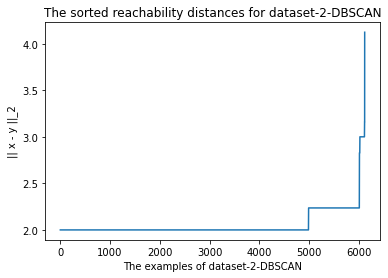

In [39]:
fig = plt.figure()  # figsize=(20,10)
ax1 = fig.add_subplot(111)

ax1.set_title("The sorted reachability distances for " + name2)
ax1.set_xlabel("The examples of " + name2)
ax1.set_ylabel("|| x - y ||_2")

ax1.plot(range(data.shape[0]), minpts_th_dst)


#fig.show()

EPS = 2.23606797749979
Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.056



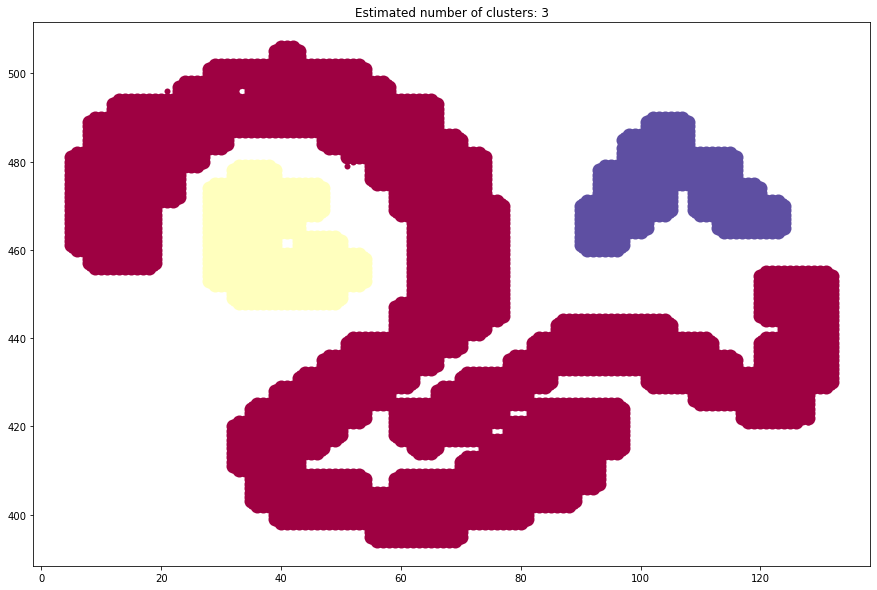

In [52]:
# Compute with new eps
eps = minpts_th_dst[6000]

print (f'EPS = {eps}')


# Run DBScan
core_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data2, eps=eps,
                                                                  minpts=10)

# Print some metric
metrics_DBSCAN(n_clusters_, n_noise_, data2)

# Plot the clustered dataset
plot_DBSCAN_result(data2, labels, core_samples_mask)

#### Optimization on Dataset 3

**WARNING!!** It takes almost **20 minutes to run on dataset 3!!** **DO NOT RUN**

In [23]:
"""data = data3

minpts_th_dst_data3 = np.zeros(data.shape[0])
for k in range(data.shape[0]):
    mask = np.ones(data.shape[0], dtype=bool)
    mask[k] = 0
    points = data[mask]

    # The point where to calcuate distances
    X = np.array([data[k],])

    dists = np.sort(euclidean_distances(X, points).reshape(-1))
    minpts_th_dst_data3[k] = dists[minpts - 1]

# Sort the set of reachability distances you obtained in an increasing way.
minpts_th_dst_data3 = np.sort(minpts_th_dst_data3)

minpts_th_dst_data3.shape"""

'data = data3\n\nminpts_th_dst_data3 = np.zeros(data.shape[0])\nfor k in range(data.shape[0]):\n    mask = np.ones(data.shape[0], dtype=bool)\n    mask[k] = 0\n    points = data[mask]\n\n    # The point where to calcuate distances\n    X = np.array([data[k],])\n\n    dists = np.sort(euclidean_distances(X, points).reshape(-1))\n    minpts_th_dst_data3[k] = dists[minpts - 1]\n\n# Sort the set of reachability distances you obtained in an increasing way.\nminpts_th_dst_data3 = np.sort(minpts_th_dst_data3)\n\nminpts_th_dst_data3.shape'

In [24]:
"""fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)

ax1.set_title("The sorted reachability distances for " + name3)
ax1.set_xlabel("The examples of " + name3)
ax1.set_ylabel("|| x - y ||_2")

ax1.plot(range(data3.shape[0]), minpts_th_dst_data3)

fig.show()"""

'fig = plt.figure(figsize=(20, 10))\nax1 = fig.add_subplot(111)\n\nax1.set_title("The sorted reachability distances for " + name3)\nax1.set_xlabel("The examples of " + name3)\nax1.set_ylabel("|| x - y ||_2")\n\nax1.plot(range(data3.shape[0]), minpts_th_dst_data3)\n\nfig.show()'

In [25]:
"""# Compute with new eps
eps = minpts_th_dst_data3[81000]

# Run DBScan
core_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data3, eps=eps, minpts=10) 

# Print some metrics
metrics_DBSCAN(n_clusters_, n_noise_, data3)

# Estimated number of clusters: 216
# Estimated number of noise points: 0
# Homogeneity: 0.180

# Plot the clustered dataset
plot_DBSCAN_result(data3, labels, core_samples_mask)"""

'# Compute with new eps\neps = minpts_th_dst_data3[81000]\n\n# Run DBScan\ncore_samples_mask, labels, n_clusters_, n_noise_ = compute_DBSCAN(X=data3, eps=eps, minpts=10) \n\n# Print some metrics\nmetrics_DBSCAN(n_clusters_, n_noise_, data3)\n\n# Estimated number of clusters: 216\n# Estimated number of noise points: 0\n# Homogeneity: 0.180\n\n# Plot the clustered dataset\nplot_DBSCAN_result(data3, labels, core_samples_mask)'